# Real-world Data Wrangling
## By : Somood Musleh

## Environment and Dependencies

In [1]:
!python -m pip install --upgrade pip


In [2]:
!pip install kaggle

In [3]:
!pip install chardet

In [4]:
!pip install scikit-learn


In [5]:
import json
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
import seaborn as sns
import requests 

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

This project aims to analyze the key factors that impact the success of movies, focusing on their popularity. The analysis will use two related datasets from Kaggle: **"TMDB 5000 Movies"** and **"TMDB 5000 Credits."**  

- The **"TMDB 5000 Movies"** dataset contains essential movie attributes such as budget, genres, revenue, release dates, and popularity scores.  
- The **"TMDB 5000 Credits"** dataset provides information about the cast and crew involved in each film.  

By merging these datasets, I will explore how various factors—such as budget, cast, director, genres, and release dates—contribute to a movie’s popularity. The goal is to uncover patterns that help predict what makes a movie popular.  

### **1.2.** Gather at least two datasets using two different data gathering methods


**List of data gathering methods:**

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs

#### **Dataset 1: TMDB 5000 Movies**  
- **Type:** CSV File  
- **Method:** The data was gathered using the **"Programmatically downloading files"** method from **Kaggle**.  

#### **Dataset Variables:**  
- `budget`: The budget allocated for the movie.  
- `popularity`: A numerical score representing the movie’s popularity.  
- `release_date`: The official release date of the movie.  
- `revenue`: The total revenue generated by the movie.  
- `genres`: A JSON-like list of genres associated with the movie.  
- `vote_average`: The average rating based on user votes.  
- `vote_count`: The total number of votes the movie received.  
- `id`: A unique identifier for the movie.  
- `title`: The official title of the movie.  
- `original_title`: The original language title of the movie.  
- `original_language`: The primary language of the movie.  
- `overview`: A brief summary of the movie’s plot.  
- `runtime`: The duration of the movie in minutes.  
- `status`: The release status of the movie (e.g., Released, Post Production).  
- `tagline`: A short promotional tagline for the movie.  
- `production_companies`: A JSON-like list of companies that produced the movie.  
- `production_countries`: A JSON-like list of countries where the movie was produced.  
- `spoken_languages`: A JSON-like list of languages spoken in the movie.  
- `homepage`: The official homepage or website for the movie.  
- `keywords`: A JSON-like list of keywords associated with the movie.  


In [6]:
# Set the dataset URL (you can find this on the dataset page)
dataset_url = "tmdb/tmdb-movie-metadata"

# Set the path where you want to save the dataset
output_dir = "./data"
os.makedirs(output_dir, exist_ok=True)

# Download the dataset
!kaggle datasets download -d {dataset_url} -p {output_dir}

# Unzip the downloaded file
import zipfile

zip_file_path = os.path.join(output_dir, "tmdb-movie-metadata.zip")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# List the files in the output directory
os.listdir(output_dir)



  0%|          | 0.00/8.89M [00:00<?, ?B/s]
 11%|#1        | 1.00M/8.89M [00:00<00:05, 1.53MB/s]
 23%|##2       | 2.00M/8.89M [00:00<00:02, 2.82MB/s]
 34%|###3      | 3.00M/8.89M [00:01<00:01, 3.65MB/s]
 45%|####5     | 4.00M/8.89M [00:01<00:01, 4.50MB/s]
 56%|#####6    | 5.00M/8.89M [00:01<00:00, 4.99MB/s]
 68%|######7   | 6.00M/8.89M [00:01<00:00, 5.46MB/s]
 79%|#######8  | 7.00M/8.89M [00:01<00:00, 5.89MB/s]
 90%|######### | 8.00M/8.89M [00:01<00:00, 6.02MB/s]
100%|##########| 8.89M/8.89M [00:01<00:00, 6.29MB/s]
100%|##########| 8.89M/8.89M [00:01<00:00, 4.78MB/s]


Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other



['.ipynb_checkpoints',
 'tmdb-movie-metadata.zip',
 'tmdb_5000_credits.csv',
 'tmdb_5000_movies.csv']

In [7]:
# Load the dataset into a DataFrame
df_movies = pd.read_csv(os.path.join(output_dir, "tmdb_5000_movies.csv"))

# Display the first few rows of the DataFrame
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### **Dataset 2: TMDB 5000 Credits**  
- **Type:** CSV File  
- **Method:** The data was gathered using the **"Download data manually"** method from **Kaggle**.  
- **Dataset Variables:**  
  - `movie_id`: A unique identifier for each movie (used for merging).  
  - `title`: The title of the movie.  
  - `cast`: A JSON-like list of actors involved in the movie.  
  - `crew`: A JSON-like list of crew members, including directors and producers.  


In [8]:
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:  Missing Values 

**Inspecting the dataframe visually**

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


**Inspecting the dataframe programmatically**

In [11]:
df_movies.isnull().sum()


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
df_credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

- **Issue:**  
  - `homepage` and `tagline` have a significant number of missing values (3,091 and 844, respectively).  
  - `runtime` and `release_date` have very few missing values (2 and 1, respectively), which may not heavily impact analysis.  
  - `spoken_languages` contains null entries, leading to incomplete information on movie languages.  
  - `overview` has 3 missing values, which could affect descriptive analysis.  
  - `budget` and `revenue` do not have missing values, but zeros may be used incorrectly instead of NaNs.  
  - `cast` and `crew` in `df_credits` have no missing values, but their content should be validated.  

- **Justification:**  
  - `homepage` and `tagline` are not critical for financial or popularity analysis but should be handled for completeness.  
  - Missing values in `overview` might be problematic for textual analyses.  
  - The presence of zeros in `budget` and `revenue` should be investigated to avoid misleading calculations.  
  - While `cast` and `crew` have no missing values, their structure must be checked for consistency and validity.

### Quality Issue 2: Incorrect Data Types

**Inspecting the dataframe visually**

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [14]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


**Inspecting the dataframe programmatically**

In [15]:
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [16]:
df_credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

- **Issue:**  
  - `release_date` is stored as **an object (string)** instead of **datetime**, making date-based analysis difficult.  
  - `budget` and `revenue` are stored as **integers**, but missing values might be incorrectly represented as **zeros** rather than NaNs.  
  - `genres`, `spoken_languages`, `production_companies`, and `cast/crew` are stored as **JSON-like strings**, requiring parsing for analysis.  

- **Justification:**  
  - Converting `release_date` to `datetime` will allow easier date filtering and time-based analysis.  
  - Replacing zero values in `budget` and `revenue` with NaNs will prevent inaccurate financial analysis.  
  - Parsing JSON-like columns into structured lists or dictionaries will make querying easier.


### Tidiness Issue 1: Separate Datasets for Movie Details and Credits

**Inspecting the dataframe visually**

In [17]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [18]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Inspecting the dataframe programmatically**

In [19]:
df_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [20]:
df_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

- **Issue:**  
  - `df_movies` contains movie attributes, while `df_credits` contains cast and crew information.  
  - Both datasets share the **`id`** column, allowing them to be **merged** into a single dataset.  
  - Keeping them separate violates the tidiness rule that **each observational unit should form a single table**.  

- **Justification:**  
  - Merging these datasets simplifies analysis, reducing the need for multiple joins.  
  - A unified dataset ensures each movie observation contains all relevant attributes, including cast and crew.

### Tidiness Issue 2: 

**Inspecting the dataframe visually**

In [21]:
df_movies[['genres','keywords', 'production_companies','production_countries','spoken_languages']].head()

,genres,keywords,production_companies,production_countries,spoken_languages
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [22]:
df_credits[['cast', 'crew']].head()

,cast,crew
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Inspecting the dataframe programmatically**

In [23]:
print(json.loads(df_movies['genres'][0]))
print()
print(json.loads(df_movies['keywords'][0]))
print()
print(json.loads(df_movies['production_companies'][0]))
print()
print(json.loads(df_movies['production_countries'][0]))
print()
print(json.loads(df_movies['spoken_languages'][0]))


[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]

[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]

[{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune 

In [24]:
print(json.loads(df_credits['cast'][0]))
print('\n\n')
print(json.loads(df_credits['crew'][0]))
	

[{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id': 3, 'character': 'Neytiri', 'credit_id': '52fe48009251416c750ac9cb', 'gender': 1, 'id': 8691, 'name': 'Zoe Saldana', 'order': 1}, {'cast_id': 25, 'character': 'Dr. Grace Augustine', 'credit_id': '52fe48009251416c750aca39', 'gender': 1, 'id': 10205, 'name': 'Sigourney Weaver', 'order': 2}, {'cast_id': 4, 'character': 'Col. Quaritch', 'credit_id': '52fe48009251416c750ac9cf', 'gender': 2, 'id': 32747, 'name': 'Stephen Lang', 'order': 3}, {'cast_id': 5, 'character': 'Trudy Chacon', 'credit_id': '52fe48009251416c750ac9d3', 'gender': 1, 'id': 17647, 'name': 'Michelle Rodriguez', 'order': 4}, {'cast_id': 8, 'character': 'Selfridge', 'credit_id': '52fe48009251416c750ac9e1', 'gender': 2, 'id': 1771, 'name': 'Giovanni Ribisi', 'order': 5}, {'cast_id': 7, 'character': 'Norm Spellman', 'credit_id': '52fe48009251416c750ac9dd', 'gender': 2


- **Issue:**  
  - `genres`, `production_companies`, `spoken_languages`, `keywords`, and `cast/crew` are stored as **JSON-formatted strings** instead of structured lists.  
  - This makes querying specific genres, production companies, or cast members difficult.  

- **Justification:**  
  - Parsing these columns into structured lists or separate columns will improve usability.  
  - Extracting relevant information (e.g., genre names, actor names) simplifies analysis.

## 3. Clean data


**Create Copies of DataFrames**

This ensures the raw data remains unchanged.

In [25]:
df_movies_clean = df_movies.copy()
df_credits_clean = df_credits.copy()

### **Quality Issue 1: Handling Missing Values**

#### **Cleaning Strategy:**  
- **Drop `homepage`**: This column is not essential for analysis.  
- **Fill `tagline` and `overview` missing values with 'Unknown'**: This prevents NaNs from interfering with text-based analysis.  
- **Fill missing `runtime` and `release_date` values using median runtime and most common release date**: This ensures minimal data loss.  
- **Drop rows where `spoken_languages` is missing**: Since language data is categorical, missing values are hard to impute.  

In [26]:
# Drop homepage column as it's not essential
df_movies_clean.drop(columns=['homepage'], inplace=True)

In [27]:
# Fill missing tagline and overview values with 'Unknown'
df_movies_clean['tagline'] = df_movies_clean['tagline'].fillna('Unknown')
df_movies_clean['overview'] = df_movies_clean['overview'].fillna('Unknown')


In [28]:
# Fill missing runtime with median
df_movies_clean['runtime'] = df_movies_clean['runtime'].fillna(df_movies_clean['runtime'].median())  

In [29]:
# Fill missing release_date with the most frequent date
most_frequent_date = df_movies_clean['release_date'].mode()[0]
df_movies_clean['release_date'] = df_movies_clean['release_date'].fillna(most_frequent_date)

In [30]:
# Drop rows where spoken_languages is missing
df_movies_clean.dropna(subset=['spoken_languages'], inplace=True)

In [31]:
df_movies_clean.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**Justification:** 
- `homepage` is non-essential for analysis, so dropping it simplifies the dataset.  
- `tagline` and `overview` can use placeholder text instead of NaNs for textual analysis.  
- Filling missing values in `runtime` and `release_date` prevents unnecessary data loss.  
- `spoken_languages` missing values are not easily imputed, so dropping them avoids inconsistencies.

### **Quality Issue 2: Correcting Data Types**

#### **Cleaning Strategy:**  
- Convert `release_date` from string to datetime format.  
- Replace zero values in `budget` and `revenue` with NaNs to avoid misleading financial analysis.  
- Parse JSON-like string columns (`genres`, `spoken_languages`, `production_companies`, `cast`, `crew`) into structured lists.  

In [32]:
# Convert release_date to datetime
df_movies_clean['release_date'] = pd.to_datetime(df_movies_clean['release_date'])

In [33]:
# Replace zero budget and revenue with NaN
df_movies_clean['budget'] = df_movies_clean['budget'].replace(0, np.nan)
df_movies_clean['revenue'] = df_movies_clean['revenue'].replace(0, np.nan)

In [34]:
def parse_json_column(column):
    return column.apply(lambda x: [i['name'] for i in json.loads(x)] if pd.notnull(x) else [])

In [35]:
def parse_json_column(column):
    def safe_parse(x):
        if isinstance(x, list):  # Already a list, return as is
            return [i['name'] for i in x if 'name' in i]
        if isinstance(x, str) and x.strip():  # Valid string, attempt JSON parsing
            try:
                parsed = json.loads(x)
                return [i['name'] for i in parsed if isinstance(i, dict) and 'name' in i]
            except json.JSONDecodeError:
                return []  # Return empty list if parsing fails
        return []  # Return empty list for NaN or empty strings

    return column.apply(safe_parse)

**Explanation**  

- **Handles lists, strings, and NaN values**  
- **Skips empty strings**  
- **Catches JSON decoding errors**  
- **Ensures only dictionaries with `'name'` are accessed**  

In [36]:
# Apply to columns
json_columns = ['genres','keywords', 'production_companies','production_countries','spoken_languages']
for col in json_columns:
    df_movies_clean[col] = parse_json_column(df_movies_clean[col])

In [37]:
df_credits_clean['cast'] = parse_json_column(df_credits_clean['cast'])
df_credits_clean['crew'] = parse_json_column(df_credits_clean['crew'])

In [38]:
df_movies_clean.dtypes

budget                         float64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [39]:
df_movies_clean.isnull().sum()

budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64

**Justification:** 
- Correcting `release_date` type allows for date-based analysis.  
- Replacing zero values in `budget` and `revenue` prevents incorrect financial conclusions.  
- Parsing JSON-like fields makes querying movie attributes easier.

### **Tidiness Issue 1: Merging Datasets**

#### **Cleaning Strategy:**  

- Merge `df_movies_clean` and `df_credits_clean` using the common `id` column.  

In [40]:
# Merge movies and credits on 'id'
df_movies_clean.rename(columns={'id': 'movie_id'}, inplace=True)
df_movies_clean.head(1)

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [41]:
# Merge movies and credits on 'id'
df_combined = df_movies_clean.merge(df_credits_clean, on='movie_id', how='left')

In [42]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3766 non-null   float64       
 1   genres                4803 non-null   object        
 2   movie_id              4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   original_title        4803 non-null   object        
 6   overview              4803 non-null   object        
 7   popularity            4803 non-null   float64       
 8   production_companies  4803 non-null   object        
 9   production_countries  4803 non-null   object        
 10  release_date          4803 non-null   datetime64[ns]
 11  revenue               3376 non-null   float64       
 12  runtime               4803 non-null   float64       
 13  spoken_languages  

In [43]:
df_combined.head(1)

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."


**Justification:**
- A merged dataset eliminates redundant joins in analysis.  
- Ensures that each movie observation includes all relevant attributes.

### **Tidiness Issue 2: Extracting Relevant Data from JSON Fields**

#### **Cleaning Strategy:**  
Extract only **useful fields** from lists (genres, cast, crew) and keep only relevant data.  

In [44]:
# Extract only the first genre
df_combined['main_genre'] = df_combined['genres'].apply(lambda x: x[0] if x else 'Unknown')

In [45]:
# Extract top 3 cast members
df_combined['top_3_cast'] = df_combined['cast'].apply(lambda x: ', '.join(x[:3]) if x else 'Unknown')


In [46]:
# Extract director from crew
def get_director(crew_list):
    for member in crew_list:
        if member == 'Director':
            return member
    return 'Unknown'


In [47]:
df_combined['director'] = df_combined['crew'].apply(get_director)

In [48]:
print(df_combined[['main_genre', 'top_3_cast', 'director']].head())  # Should show extracted fields

  main_genre                                      top_3_cast director
0     Action  Sam Worthington, Zoe Saldana, Sigourney Weaver  Unknown
1  Adventure     Johnny Depp, Orlando Bloom, Keira Knightley  Unknown
2     Action      Daniel Craig, Christoph Waltz, Léa Seydoux  Unknown
3     Action      Christian Bale, Michael Caine, Gary Oldman  Unknown
4     Action    Taylor Kitsch, Lynn Collins, Samantha Morton  Unknown


**Justification:**
- Extracting **main genre** simplifies genre-based analysis.  
- Keeping only the **top 3 actors** makes cast analysis manageable.  
- Isolating **director names** allows for better film industry insights.

### **Remove unnecessary variables**

Depending on the datasets, you can also peform the combination before the cleaning steps.

#### **Cleaning Strategy:**  
Keep only relevant columns needed for analysis.

In [49]:
df_combined.drop(columns=['keywords', 'original_language', 'original_title', 'production_companies', 'production_countries', 'spoken_languages', 'status','cast', 'crew'], inplace=True)


In [50]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   budget        3766 non-null   float64       
 1   genres        4803 non-null   object        
 2   movie_id      4803 non-null   int64         
 3   overview      4803 non-null   object        
 4   popularity    4803 non-null   float64       
 5   release_date  4803 non-null   datetime64[ns]
 6   revenue       3376 non-null   float64       
 7   runtime       4803 non-null   float64       
 8   tagline       4803 non-null   object        
 9   title_x       4803 non-null   object        
 10  vote_average  4803 non-null   float64       
 11  vote_count    4803 non-null   int64         
 12  title_y       4803 non-null   object        
 13  main_genre    4803 non-null   object        
 14  top_3_cast    4803 non-null   object        
 15  director      4803 non-null   object  

In [51]:
df_combined.head(1)

,budget,genres,movie_id,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,title_y,main_genre,top_3_cast,director
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,Action,"Sam Worthington, Zoe Saldana, Sigourney Weaver",Unknown


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [52]:
df_movies_clean.to_csv('raw_tmdb_movies.csv', index=False)
df_credits_clean.to_csv('raw_tmdb_credits.csv', index=False)
df_combined.to_csv('cleaned_combined_tmdb_movies.csv', index=False)

## 5. Answer the research question

#### **Research Question**  
What factors contribute most to a movie's financial success (high revenue) on TMDb?  

#### **Visualization 1: Budget vs. Revenue** 

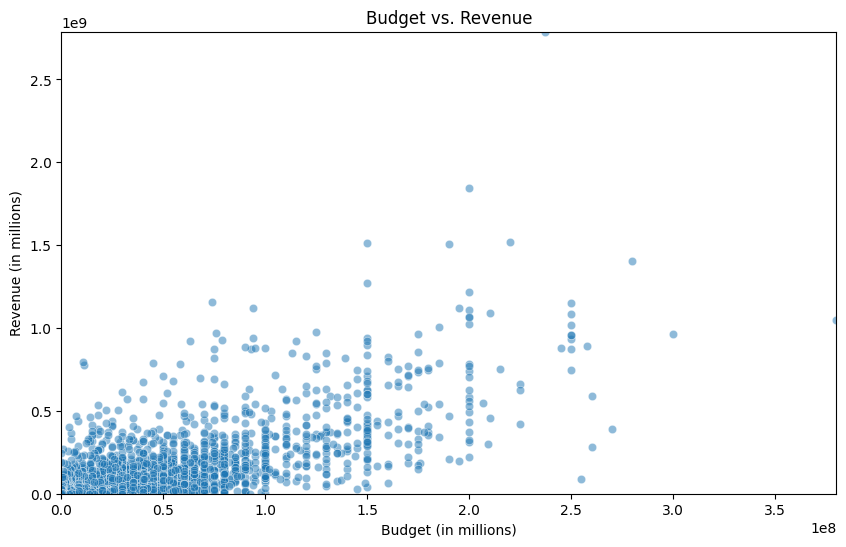

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Budget vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='budget', y='revenue', alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in millions)')
plt.xlim(0, df_combined['budget'].max())
plt.ylim(0, df_combined['revenue'].max())
plt.show()



##### **Answer:**  
This scatter plot shows the relationship between a movie's budget and its revenue. A positive correlation suggests that movies with higher budgets tend to generate more revenue. However, some outliers indicate that a high budget does not always guarantee high revenue.

#### **Visualization 2: Popularity vs. Revenue**  

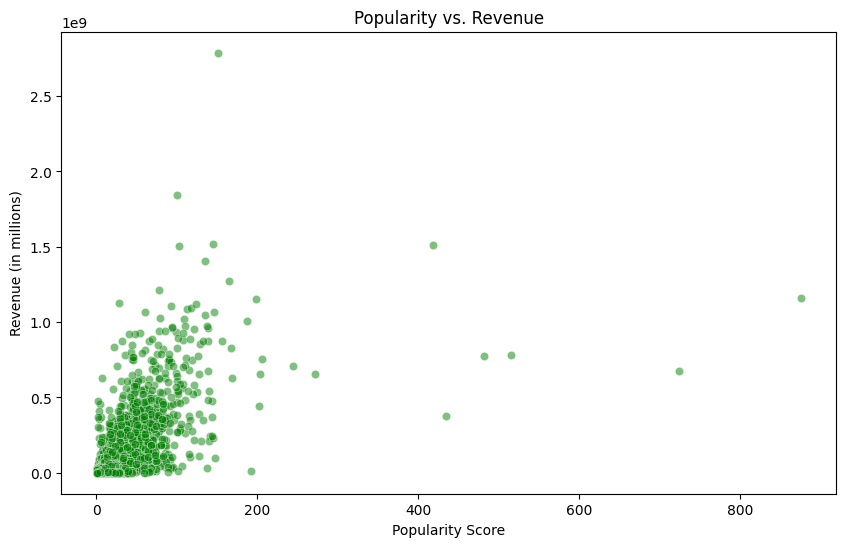

In [54]:
# Scatter plot of Popularity vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='popularity', y='revenue', alpha=0.5, color='green')
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity Score')
plt.ylabel('Revenue (in millions)')
plt.show()


##### **Answer:**  
This visualization shows that movies with higher popularity scores generally have higher revenues. This suggests that audience interest, marketing, and social media buzz play a significant role in a movie's financial success.

### **5.2:** Reflection


If I had more time, I would refine how missing financial data is handled to ensure a more accurate analysis. Additionally, I would explore more features like director influence, genre impact, and release month effects on revenue. Examining non-financial factors, such as audience reviews and awards, could provide further insights into a movie’s success beyond budget and popularity.  